In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine

# Load Data from PostgreSQL
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}

connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

query = 'SELECT * FROM public.updated_overall_cleaned_data;'
df = pd.read_sql(query, con=engine)

C:\Users\kaviyam\AppData\Local\Temp\ipykernel_1280\4195535957.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


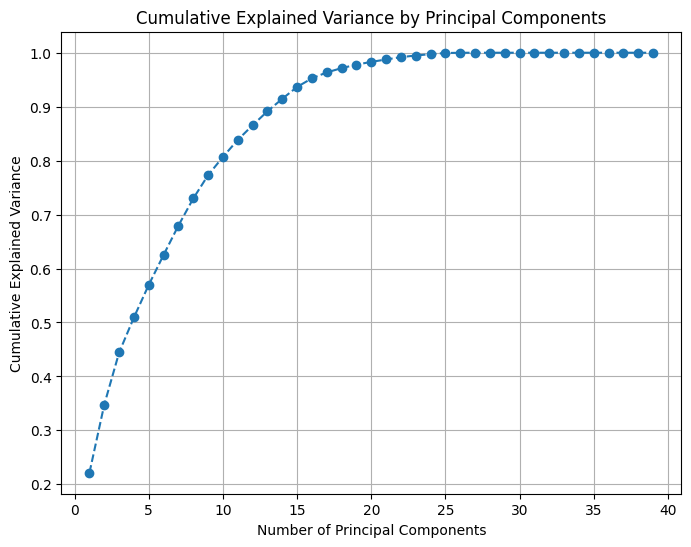

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fill missing values for both categorical and numerical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('missing')
    else:
        df[column] = df[column].fillna(0)

# Identify date columns by checking for columns that could represent dates
date_columns = [col for col in df.columns if 'date' in col.lower()]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract year, month, and day as separate features for all identified date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = df[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = df[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = df[col].dt.day.fillna(0).astype(int)

# Use pd.concat to add these new columns efficiently
df = pd.concat([df, pd.DataFrame(new_date_cols)], axis=1)

# Drop the original date columns after extracting year, month, and day
df = df.drop(date_columns, axis=1)

# Select numerical columns only for PCA
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable if it exists in numerical columns
if 'Policy Status' in numerical_columns:
    numerical_columns.remove('Policy Status')

# Standardize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])  

# Perform PCA without specifying n_components to visualize explained variance
pca = PCA()
pca.fit(df_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Perform PCA with n_components
n_components = 20
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Save PCA Results
pca_result_path = os.path.join(os.getcwd(), "pca_result_reduced_20.csv")
pca_df.to_csv(pca_result_path, index=False)
print(f" PCA-transformed data saved: {pca_result_path}")

# Use the correct numerical feature names
original_feature_names = numerical_columns  # Ensure correct mapping

pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute total contribution of each feature
feature_importance = pca_components.abs().sum(axis=0)
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort feature contributions in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

feature_importance_path = os.path.join(os.getcwd(), "pca_feature_importance_summed_20.csv")
sorted_feature_importance.to_csv(feature_importance_path, index=True)
print(f"Feature importance saved: {feature_importance_path}")

# Print Top 10 Contributing Features
print("\n Top 10 Contributing Features to PCA:")
print(sorted_feature_importance.head(10))

 PCA-transformed data saved: c:\Users\kaviyam\AppData\Local\Programs\Microsoft VS Code\pca_result_reduced_20.csv
Feature importance saved: c:\Users\kaviyam\AppData\Local\Programs\Microsoft VS Code\pca_feature_importance_summed_20.csv

 Top 10 Contributing Features to PCA:
                              Total Contribution
total tp premium                        3.447670
applicable discount with ncb            3.366845
age                                     3.309223
null_count                              3.119174
road side assistance                    2.916792
ncb % previous year                     2.878874
before gst add-on gwp                   2.671383
policy_wise_purchase                    2.621515
chain_group                             2.619765
new_chain_flag                          2.521450


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Perform PCA with n_components
n_components = 25
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Save PCA Results
pca_result_path = os.path.join(os.getcwd(), "pca_result_reduced_25.csv")
pca_df.to_csv(pca_result_path, index=False)
print(f" PCA-transformed data saved: {pca_result_path}")

# Use the correct numerical feature names
original_feature_names = numerical_columns  # Ensure correct mapping

pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute total contribution of each feature
feature_importance = pca_components.abs().sum(axis=0)
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort feature contributions in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

feature_importance_path = os.path.join(os.getcwd(), "pca_feature_importance_summed_25.csv")
sorted_feature_importance.to_csv(feature_importance_path, index=True)
print(f"Feature importance saved: {feature_importance_path}")

# Print Top 10 Contributing Features
print("\n Top 10 Contributing Features to PCA:")
print(sorted_feature_importance.head(10))

 PCA-transformed data saved: c:\Users\kaviyam\AppData\Local\Programs\Microsoft VS Code\pca_result_reduced_25.csv
Feature importance saved: c:\Users\kaviyam\AppData\Local\Programs\Microsoft VS Code\pca_feature_importance_summed_25.csv

 Top 10 Contributing Features to PCA:
                              Total Contribution
applicable discount with ncb            3.927313
total tp premium                        3.816613
policy_wise_purchase                    3.740013
new_chain_flag                          3.544381
age                                     3.518424
vehicle idv                             3.373905
road side assistance                    3.282898
null_count                              3.258287
next_policy_start_date_DAY              3.191118
next_policy_start_date_MONTH            3.138219


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine

# Load Data from PostgreSQL
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}

connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

query = 'SELECT * FROM public.updated_overall_cleaned_data;'
df = pd.read_sql(query, con=engine)

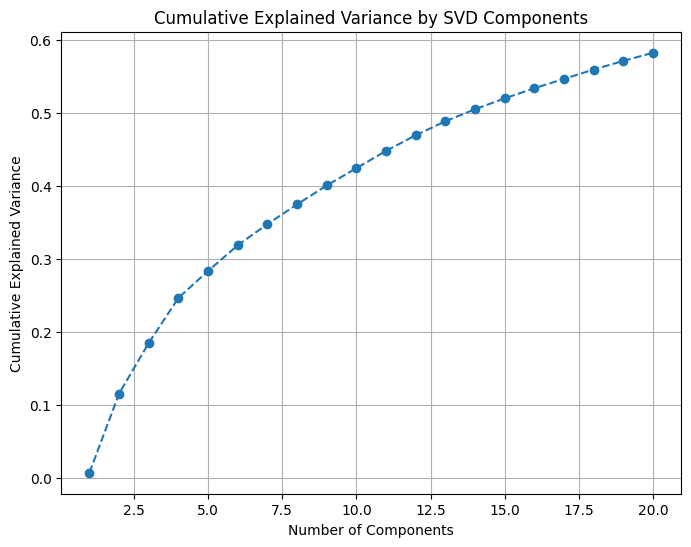

SVD-transformed data saved: svd_result_categorical.csv


In [ ]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Select only categorical features (including booleans)
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Remove datetime columns explicitly
datetime_columns = df.select_dtypes(include=['datetime64']).columns.tolist()
df = df.drop(columns=datetime_columns, errors="ignore")

# Fill missing values in categorical columns with "missing"
df[categorical_columns] = df[categorical_columns].fillna("missing")

# Convert Boolean columns to string format (to avoid type conflicts)
df[categorical_columns] = df[categorical_columns].astype(str)

# Drop columns with more than 50 unique values
unique_counts = df[categorical_columns].nunique()
high_cardinality_columns = unique_counts[unique_counts > 50].index.tolist()
df_filtered = df.drop(columns=high_cardinality_columns, errors="ignore")

# Group rare categories into "Other" by keeping only the top 10 most frequent categories
for col in df_filtered.columns:
    if df_filtered[col].dtype == "object":
        top_categories = df_filtered[col].value_counts().nlargest(10).index
        df_filtered[col] = df_filtered[col].apply(lambda x: x if x in top_categories else "Other")

# Convert each row into a dictionary for FeatureHasher
hasher = FeatureHasher(n_features=500, input_type="dict")  # Hash to 500 features
records = df_filtered.astype(str).to_dict(orient='records')
sparse_matrix = hasher.transform(records)  # This is a sparse matrix

# Use TruncatedSVD, which supports sparse matrices, as an alternative to MCA.
n_components = min(sparse_matrix.shape[1], 20)  # Limit to 20 components
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_transformed = svd.fit_transform(sparse_matrix)

# Convert the SVD results to a DataFrame
svd_df = pd.DataFrame(svd_transformed, columns=[f'MC{i}' for i in range(1, n_components + 1)])

# Visualize Cumulative Explained Variance
explained_variance = svd.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Save SVD Results
svd_df.to_csv("svd_result_categorical.csv", index=False)
print("SVD-transformed data saved: svd_result_categorical.csv")

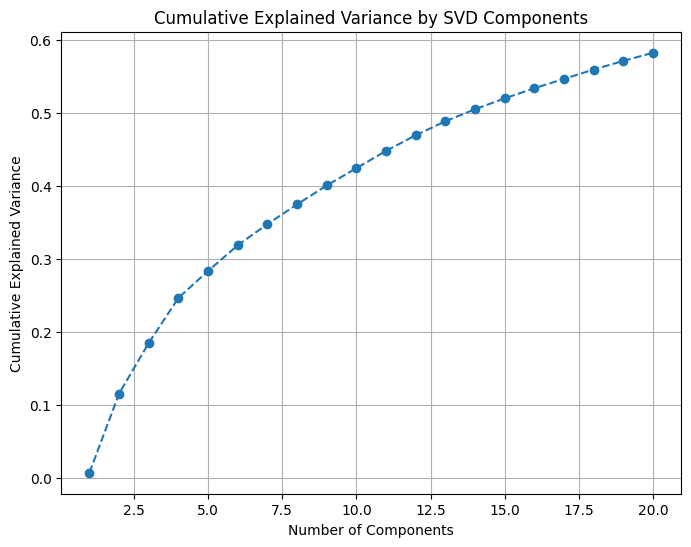

Total variance explained by 20 components: 58.19%
SVD-transformed data saved to: d:\Accuracy Improvement Task\svd_result_20_components.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import TruncatedSVD


# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Remove datetime columns explicitly
datetime_columns = df.select_dtypes(include=['datetime64']).columns.tolist()
df = df.drop(columns=datetime_columns, errors="ignore")

# Fill missing values in categorical columns with "missing"
df[categorical_columns] = df[categorical_columns].fillna("missing")

# Convert Boolean columns to string format (to avoid type conflicts)
df[categorical_columns] = df[categorical_columns].astype(str)

# Reduce High-Cardinality Features
unique_counts = df[categorical_columns].nunique()
high_cardinality_columns = unique_counts[unique_counts > 50].index.tolist()
df_filtered = df.drop(columns=high_cardinality_columns, errors="ignore")

# 2b. Group rare categories into "Other" (keep only top 10)
for col in df_filtered.columns:
    if df_filtered[col].dtype == "object":
        top_categories = df_filtered[col].value_counts().nlargest(10).index
        df_filtered[col] = df_filtered[col].apply(lambda x: x if x in top_categories else "Other")

# Feature Hashing (Sparse Representation)
hasher = FeatureHasher(n_features=500, input_type="dict")
records = df_filtered.astype(str).to_dict(orient='records')
sparse_matrix = hasher.transform(records)

# We pick 20 components based on your scree plot.
n_components = 20
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_transformed = svd.fit_transform(sparse_matrix)

# Convert SVD results to a DataFrame
svd_df = pd.DataFrame(svd_transformed, columns=[f'SVD_{i}' for i in range(1, n_components + 1)])

# Plot Cumulative Explained Variance
explained_variance = svd.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print the final cumulative variance
print(f"Total variance explained by {n_components} components: {cumulative_variance[-1]*100:.2f}%")

# Save Results
output_path = os.path.join(os.getcwd(), "svd_result_20_components.csv")
svd_df.to_csv(output_path, index=False)
print(f"SVD-transformed data saved to: {output_path}")

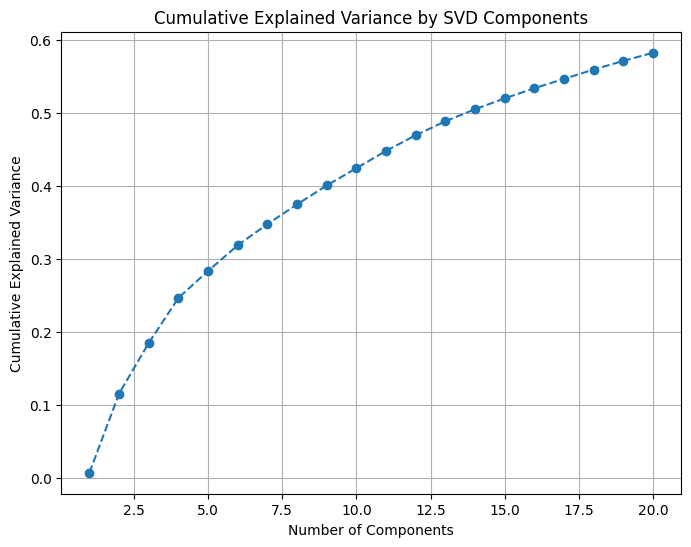

Total variance explained by 20 components: 58.19%
SVD-transformed data saved to: d:\Accuracy Improvement Task\svd_result_20_components.csv
MCA Feature importance saved: d:\Accuracy Improvement Task\mca_feature_importance_summed_20.csv

Top 10 Contributing Features to MCA:
             Total Contribution
feature_499                 0.0
feature_0                   0.0
feature_1                   0.0
feature_2                   0.0
feature_483                 0.0
feature_482                 0.0
feature_481                 0.0
feature_480                 0.0
feature_479                 0.0
feature_478                 0.0


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import TruncatedSVD
from prince import MCA

# Data Preparation
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64']).columns.tolist()
df = df.drop(columns=datetime_columns, errors="ignore")
df[categorical_columns] = df[categorical_columns].fillna("missing")
df[categorical_columns] = df[categorical_columns].astype(str)

# Reduce High-Cardinality Features
unique_counts = df[categorical_columns].nunique()
high_cardinality_columns = unique_counts[unique_counts > 50].index.tolist()
df_filtered = df.drop(columns=high_cardinality_columns, errors="ignore")

# Group rare categories into "Other" (keep only top 10)
for col in df_filtered.columns:
    if df_filtered[col].dtype == "object":
        top_categories = df_filtered[col].value_counts().nlargest(10).index
        df_filtered[col] = df_filtered[col].apply(lambda x: x if x in top_categories else "Other")

# Feature Hashing 
hasher = FeatureHasher(n_features=500, input_type="dict")
records = df_filtered.astype(str).to_dict(orient='records')
sparse_matrix = hasher.transform(records)

# This section is for generating your SVD results and variance plot.
n_components = 20
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_transformed = svd.fit_transform(sparse_matrix)
svd_df = pd.DataFrame(svd_transformed, columns=[f'SVD_{i}' for i in range(1, n_components + 1)])
explained_variance = svd.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
print(f"Total variance explained by {n_components} components: {cumulative_variance[-1]*100:.2f}%")
output_path = os.path.join(os.getcwd(), "svd_result_20_components.csv")
svd_df.to_csv(output_path, index=False)
print(f"SVD-transformed data saved to: {output_path}")

# To avoid memory issues, take a random sample (e.g., 1% of rows).
sample_fraction = 0.01 
n_rows = sparse_matrix.shape[0]
sample_size = int(n_rows * sample_fraction)
sample_indices = np.random.choice(n_rows, sample_size, replace=False)
sparse_sample = sparse_matrix[sample_indices]

# Convert sampled sparse matrix to dense DataFrame for MCA
df_encoded_sample = pd.DataFrame(
    sparse_sample.toarray(), 
    columns=[f'feature_{i}' for i in range(sparse_matrix.shape[1])]
)

# Perform MCA on Sampled Data
n_components_mca = 20 
mca = MCA(n_components=n_components_mca, random_state=42)
mca = mca.fit(df_encoded_sample)

# Compute MCA Feature Importance
original_feature_names = df_encoded_sample.columns.tolist()
mca_components = pd.DataFrame(
    mca.column_coordinates(df_encoded_sample),
    columns=original_feature_names
)

# Compute total contribution for each feature by summing the absolute loadings
feature_importance = mca_components.abs().sum(axis=0)
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort feature contributions in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save and Display the MCA Feature Importance
feature_importance_path = os.path.join(os.getcwd(), "mca_feature_importance_summed_20.csv")
sorted_feature_importance.to_csv(feature_importance_path, index=True)
print(f"MCA Feature importance saved: {feature_importance_path}")

print("\nTop 10 Contributing Features to MCA:")
print(sorted_feature_importance.head(10))